
Fresnel_Reflection_gta_main



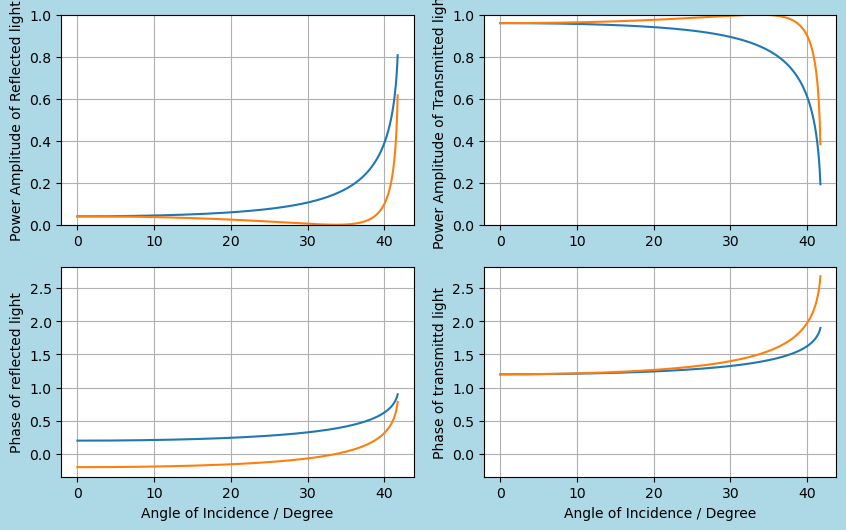

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Fresnel_Reflection_gta_def(param=0.01,m=512):

    #steptheta1 = 0.163036; # degree
    steptheta1 = 41.8/m; # degree

    theta1col = np.zeros((m,1)); # aoi. Angle Of Incidence
    theta2col = np.zeros((m,1))

    rscol = np.zeros((m,1))
    rpcol = np.zeros((m,1))
    
    tscol = np.zeros((m,1))
    tpcol = np.zeros((m,1))

    PTscol = np.zeros((m,1)); # PowerTrans
    
    PRscol = np.zeros((m,1)); # PowerReflection

    PTpcol = np.zeros((m,1)); # Phase of Trans E

    PRpcol = np.zeros((m,1)); # Phase of Refleced E

    #atg
    # n2 must be higher than n1 because this code is assuming air to glass incidence.
    #gta
    # n1 must be higher than n2 because this code is assuming glass to air incidence.
    
    n1 = 1.5
    n2 = 1


    for ii in range(m):

        theta1 = ii * steptheta1
        theta1col[(ii)] = theta1

        costheta1=math.cos(math.pi*theta1/180)
        
        
        theta2 = math.asin((n1/n2)*math.sin(math.pi*theta1/180))*(180/math.pi)
        theta2col[(ii)] = theta2

        costheta2 = math.cos(math.pi*theta2/180)
        
        # S Polarization

        rs = (n1*costheta1-n2*costheta2)/(n1*costheta1+n2*costheta2)
        rscol[(ii)] = rs

        PRs = (np.abs(rs))**2
        PRscol[(ii)]=PRs
        
        ts = (2*n1*costheta1)/(n1*costheta1+n2*costheta2)
        tscol[(ii)] = ts

        PTs = (n2/n1)*(costheta2/costheta1)*(np.abs(ts))**2
        PTscol[(ii)]=PTs

        # P Polarization

        rp = (n2*costheta1-n1*costheta2)/(n2*costheta1+n1*costheta2)
        rpcol[(ii)] = rp

        PRp = (np.abs(rp))**2
        PRpcol[(ii)]=PRp

        tp = (2*n1*costheta1)/(n2*costheta1+n1*costheta2)
        tpcol[(ii)] = tp

        PTp = (n2/n1)*(costheta2/costheta1)*(np.abs(tp))**2      
        PTpcol[(ii)]=PTp


        #Erphase = cmath.phase(Er)
        #Erphasecol[(ii)] = Erphase
        
        #Trans
        #conjEt = Et.conjugate()
        #PT = abs(Et)**2
        #PTetacol[(ii)]=PT

        #Etphase = cmath.phase(Et)
        #Etphasecol[(ii)] = Etphase         

    return theta1col, theta2col, rscol, tscol, rpcol, tpcol, PRscol, PTscol, PRpcol, PTpcol



if __name__ == '__main__':
    param = 0.001
    m = 512

theta1col, theta2col, rscol, tscol, rpcol, tpcol, PRscol, PTscol, PRpcol, PTpcol = Fresnel_Reflection_gta_def(param,m)

print('')
print('Fresnel_Reflection_gta_main')
print('')

fig = plt.figure(figsize = (10,6), facecolor='lightblue')


ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax3)

ax1.plot(theta1col,PRscol,theta1col,PRpcol)
ax1.set_ylabel("Power Amplitude of Reflected light")
ax1.set_ylim(0,1)
ax1.grid()

ax2.plot(theta1col,PTscol,theta1col,PTpcol)
ax2.set_ylabel("Power Amplitude of Transmitted light")
ax2.set_ylim(0,1)
ax2.grid()

ax3.plot(theta1col,rscol,theta1col,rpcol)
ax3.set_xlabel("Angle of Incidence / Degree")
ax3.set_ylabel("Phase of reflected light")
ax3.grid()

ax4.plot(theta1col,tscol,theta1col,tpcol)
ax4.set_xlabel("Angle of Incidence / Degree")
ax4.set_ylabel("Phase of transmittd light")
ax4.grid()

plt.show()